<h1>ML Variance Model that predicts daily volatility of stock using linear regression</h1>

gathering data from yfinance


In [12]:
import yfinance as yf
import numpy as np
import matplotlib as plt

ticker = yf.Ticker('AAPL')
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01') #input desired stock ticker here
volume = ticker.info["averageVolume10days"]

data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-01-03,179.076599,182.009995,182.880005,177.710007,177.830002,104487900
2022-01-04,176.803833,179.699997,182.940002,179.119995,182.630005,99310400
2022-01-05,172.100861,174.919998,180.169998,174.639999,179.610001,94537600
2022-01-06,169.227936,172.000000,175.300003,171.639999,172.699997,96904000
2022-01-07,169.395187,172.169998,174.139999,171.029999,172.889999,86709100


</h2>calculate daily returns and volatility</h2>

In [13]:
# Calculate daily returns (returns list of percentage change for each day compared to previous)
data['Return'] = data['Adj Close'].pct_change()

# Calculate rolling variance (volatility) over a 20-day window
data['Volatility'] = data['Return'].rolling(window=20).var()

# Drop rows with NaN values resulting from calculations
data.dropna(inplace=True)

# Display the updated data
data[['Return', 'Volatility']].head()

Price,Return,Volatility
Ticker,,
Date,,
2022-02-01,-0.000973,0.000449
2022-02-02,0.007044,0.000446
2022-02-03,-0.016720,0.000425
2022-02-04,-0.001679,0.000410
2022-02-07,-0.004235,0.000411


use previous day's volatility and moving average as features

In [14]:
# Feature 1: Previous day's volatility
data['Volatility_Lag1'] = data['Volatility'].shift(1)

# Feature 2: 20-day moving average of returns
data['MA_Return'] = data['Return'].rolling(window=20).mean()

# Drop any new NaN values (i.e. empty values)
data.dropna(inplace=True)

# Define feature matrix X and target vector y
X = data[['Volatility_Lag1', 'MA_Return']]
y = data['Volatility']

split data (use 80 20 ratio for training and testing)

In [15]:
from sklearn.model_selection import train_test_split

# Since it's time series, we'll split based on index
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


train using linear regression for simplicity

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

predict

In [17]:
# Predict volatility on the test set
y_pred = model.predict(X_test)

evaluate model

In [18]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
#rmse = root_mean_squared_log_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.6f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

Mean Absolute Error (MAE): 0.000013


visualizing the data

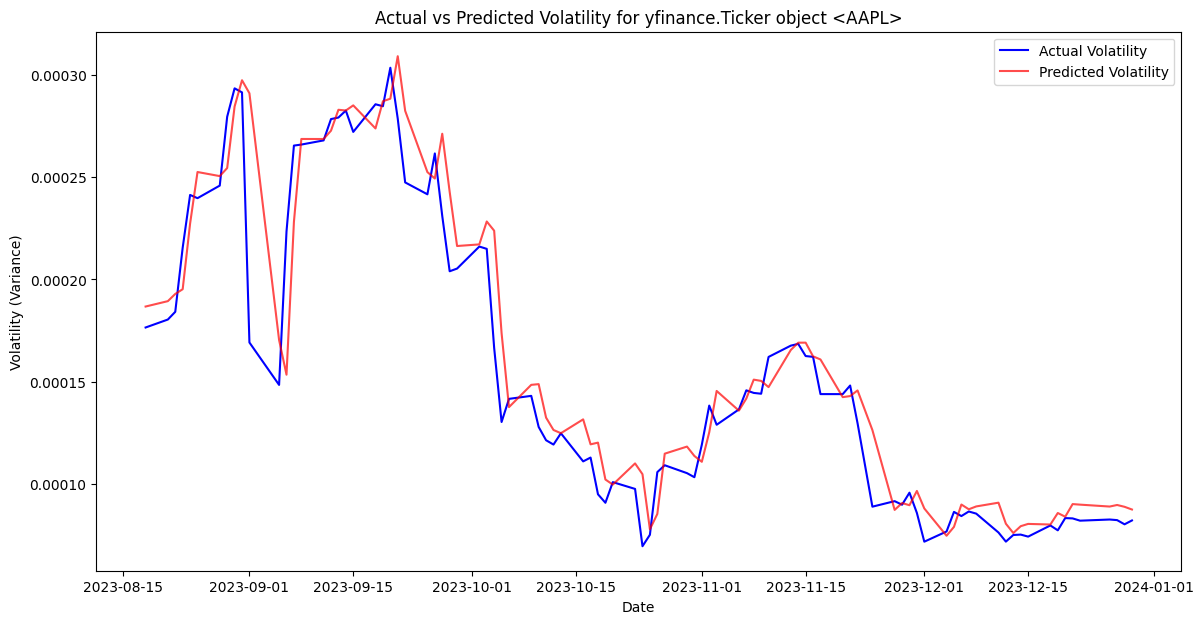

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(14,7))

# Plot actual volatility
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')

# Plot predicted volatility
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', alpha=0.7)

# Add title and labels
plt.title(f'Actual vs Predicted Volatility for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volatility (Variance)')

# Show legend
plt.legend()

# Display the plot
plt.show()